### **Customer Satisfaction Project — Notebook 2: Text Processing & NLP Feature Engineering**

**Author:** Deepika Priya K

**Notebook Goals**

- Clean and preprocess text (subject + description)

- Create combined text for NLP

- Extract TF-IDF keywords to understand root causes

- Prepare text features for ML notebook

- Save processed NLP dataset for Notebook 3

**Main Objective:**

Extract key text patterns influencing customer satisfaction.

In [ ]:
# 1. Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Set display options
pd.set_option('display.max_columns',100)
pd.set_option('display.width',120)

# 3. Load the dataset prepared in notebook 1
df_model = pd.read_csv("df_model.csv")

df_model.head()

,ticket_id,customer_name,customer_email,customer_age,customer_gender,product_purchased,date_of_purchase,ticket_type,ticket_subject,ticket_description,resolution,ticket_priority,ticket_channel,first_response_time,time_to_resolution,customer_satisfaction_rating,satisfaction_binary,first_response_minutes,resolution_minutes,age_group
0,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,0,1.515555e+06,1.515966e+06,40-60
1,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,0,1.339650e+06,1.339318e+06,25-40
2,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,0,1.746733e+06,1.747914e+06,60+
3,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,0,1.243787e+06,1.242712e+06,40-60
4,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,0,8.431258e+05,8.429678e+05,40-60


### **Natural Language Processing**
- Ticket Subject NLP

In [ ]:
# Check unique subjects
df_model['ticket_subject'].value_counts().head(20)

,count
ticket_subject,
Network problem,201
Software bug,199
Product compatibility,195
Product recommendation,186
Product setup,183
Hardware issue,183
Delivery problem,178
Refund request,178
Battery life,173


In [ ]:
# Clean the text (lowercase, remove extra spaces)

import re                                     # Regular Expression module

def clean_text(text):
  text = text.lower()                         # lowercase
  text = re.sub(r'[^a-zA-Z0-9]',' ',text)     # remove punctuation
  text = re.sub(r'\s+',' ',text).strip()      # remove extra spaces
  return text

df_model['ticket_subject_clean'] = df_model['ticket_subject'].apply(clean_text)
df_model[['ticket_subject','ticket_subject_clean']].head()

,ticket_subject,ticket_subject_clean
0,Network problem,network problem
1,Account access,account access
2,Data loss,data loss
3,Data loss,data loss
4,Software bug,software bug


In [ ]:
# Most Common Ticket Subjects (Top 20)
from collections import Counter

subject_counts = Counter(df_model['ticket_subject_clean'])

subject_counts_df = pd.DataFrame(subject_counts.most_common(20), columns = ['subject','count'])
subject_counts_df

,subject,count
0,network problem,201
1,software bug,199
2,product compatibility,195
3,product recommendation,186
4,product setup,183
5,hardware issue,183
6,delivery problem,178
7,refund request,178
8,battery life,173
9,account access,171


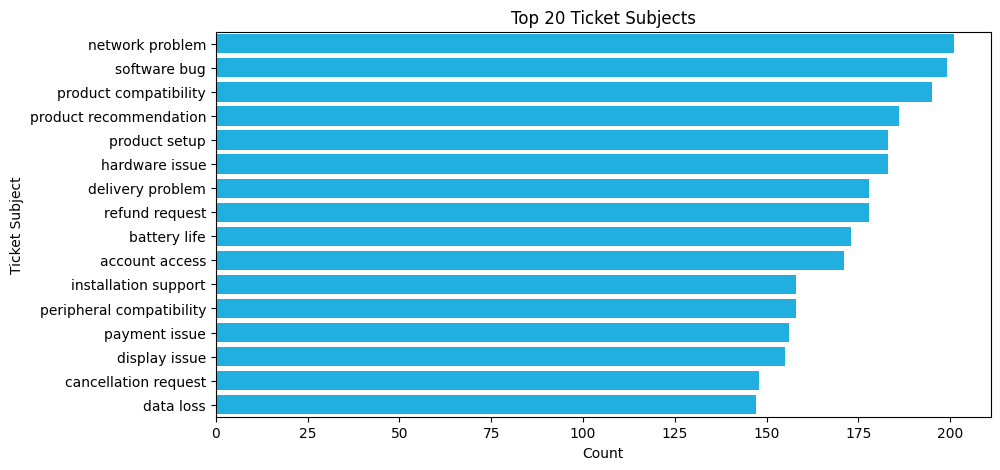

In [ ]:
# Bar Chart of Top Subjects
plt.figure(figsize=(10,5))
sns.barplot(data=subject_counts_df, x='count', y='subject', color='deepskyblue')
plt.title("Top 20 Ticket Subjects")
plt.xlabel("Count")
plt.ylabel("Ticket Subject")
plt.show()

**Ticket Subject Insights (Top Issues) :**

- **Network problems** are the most frequent (~200 cases).

- **Software bugs** and **product compatibility** are also very common.

- **Setup, hardware, delivery, and refund issues** appear often.

- Overall, **customers contact support for many different reasons** — no single issue dominates.

In [ ]:
# Calculate satisfaction rate per ticket subject

subject_satisfaction = df_model.groupby('ticket_subject_clean')['satisfaction_binary'].mean().reset_index()

subject_satisfaction.head()

,ticket_subject_clean,satisfaction_binary
0,account access,0.380117
1,battery life,0.398844
2,cancellation request,0.405405
3,data loss,0.408163
4,delivery problem,0.325843


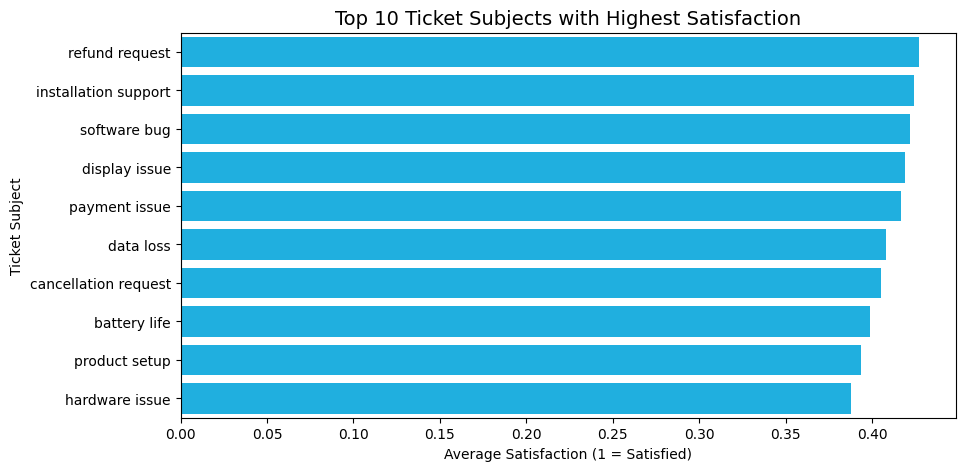

In [ ]:
# Top 10 subjects with highest satisfaction
top_best = subject_satisfaction.sort_values(by='satisfaction_binary', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_best, x='satisfaction_binary', y='ticket_subject_clean',color='deepskyblue')
plt.title("Top 10 Ticket Subjects with Highest Satisfaction", fontsize=14)
plt.xlabel("Average Satisfaction (1 = Satisfied)")
plt.ylabel("Ticket Subject")
plt.show()

**Top 10 Subjects with Highest Satisfaction :**

**(Refund → Hardware issue)**

- **Refund request** has the highest satisfaction (~0.43).

    → Customers feel the issue is solved cleanly.

- **Installation support** and **software bug** also show good satisfaction (~0.42).

    → Clear resolutions and predictable workflows.

- **Product setup** and **hardware issue** are moderately positive.

- **General pattern:**

    → **Technical/operational issues tend to be handled well**, leading to higher satisfaction.

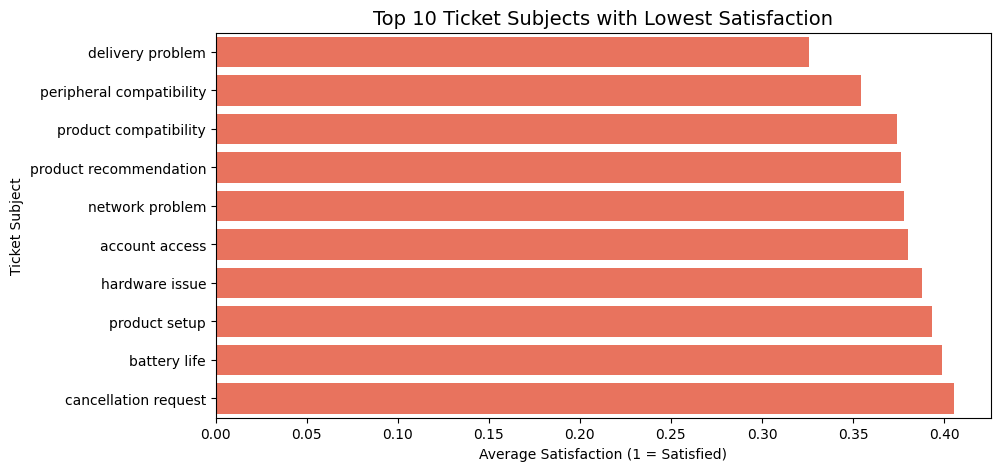

In [ ]:
# Bottom 10 subjects with lowest satisfaction
top_worst = subject_satisfaction.sort_values(by='satisfaction_binary',ascending=True).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_worst, x='satisfaction_binary', y='ticket_subject_clean', color='tomato')
plt.title("Top 10 Ticket Subjects with Lowest Satisfaction", fontsize=14)
plt.xlabel("Average Satisfaction (1 = Satisfied)")
plt.ylabel("Ticket Subject")
plt.show()

**Top 10 Subjects with Lowest Satisfaction :**

**(Delivery problem →  Cancellation request)**

- **Delivery problems** show the lowest satisfaction (~0.32).

    → Customers are upset when orders are late or missing.

- **Product compatibility** and **peripheral compatibility** are also lower (~0.35).

    → These issues are more complex for users.

- **Network problems** and **account access** (~0.36–0.37) also show dissatisfaction.

- **Cancellation requests** are slightly better than the worst (~0.41), but still below average.

In [ ]:
# Clean ticket_description just like subject

# Function to clean text (lowercase + remove punctuation + extra spaces)
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9 ]', ' ', text)   # keep only letters/numbers/spaces
    text = re.sub(r'\s+', ' ', text).strip()     # remove extra spaces
    return text

# Apply cleaning
df_model['ticket_description_clean'] = df_model['ticket_description'].apply(clean_text)
df_model[['ticket_description', 'ticket_description_clean']].head()

,ticket_description,ticket_description_clean
0,I'm facing a problem with my {product_purchase...,i m facing a problem with my product purchased...
1,I'm having an issue with the {product_purchase...,i m having an issue with the product purchased...
2,I'm having an issue with the {product_purchase...,i m having an issue with the product purchased...
3,I'm having an issue with the {product_purchase...,i m having an issue with the product purchased...
4,I'm having an issue with the {product_purchase...,i m having an issue with the product purchased...


In [ ]:
# Combine SUBJECT + DESCRIPTION into one clean column
df_model['combined_text_clean'] = (df_model['ticket_subject_clean'] + " " + df_model['ticket_description_clean'])

In [ ]:
# Filter UNSATISFIED tickets
unsatisfied = df_model[df_model['satisfaction_binary'] == 0].copy()

In [ ]:
# Extract Top 30 Negative Keywords (word frequency)

# Combine all text into one big string
all_text = " ".join(unsatisfied['combined_text_clean'])

# Tokenize words
word = all_text.split()

In [ ]:
# Remove stopwords
import nltk                             # Natural Language Toolkit
from nltk.corpus import stopwords
nltk.download('stopwords')              # because NLTK doesn’t install language datasets automatically
stop = set(stopwords.words('english'))

filtered = [w for w in word if w not in stop]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Count most frequent words
from collections import Counter
word_counts = Counter(filtered).most_common(30)

# Convert to dataframe
keyword_df = pd.DataFrame(word_counts, columns=['keyword', 'count'])
keyword_df.head()

,keyword,count
0,product,3714
1,purchased,2853
2,issue,2575
3,please,1777
4,assist,1260


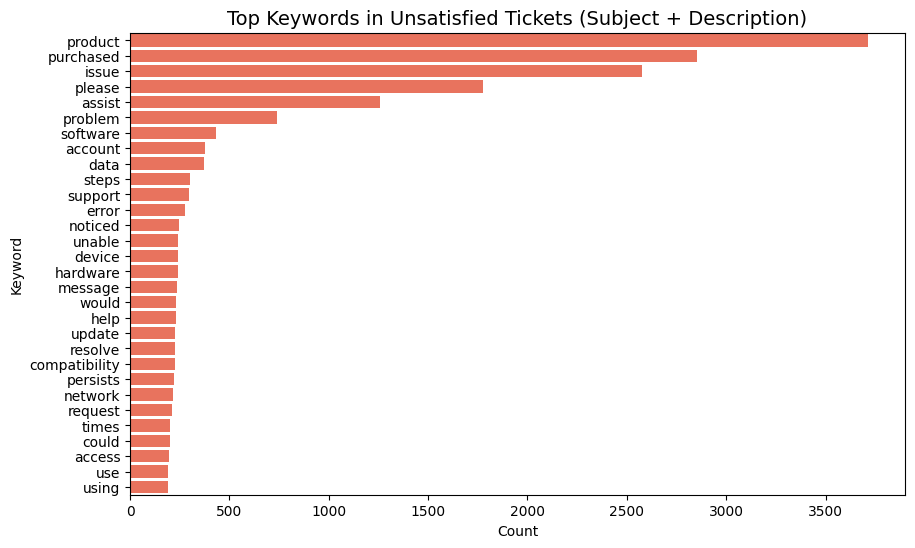

In [ ]:
# Bar Chart of Top 30 Negative Keywords
plt.figure(figsize=(10,6))
sns.barplot(data=keyword_df, x='count', y='keyword', color='tomato')
plt.title("Top Keywords in Unsatisfied Tickets (Subject + Description)", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Keyword")
plt.show()

**Insights : Top Negative Keywords**

These keywords appear the most in unsatisfied tickets — meaning they highlight customer pain points.

**What Customers Complain About Most**

- **product** → most frequent word; issues related to the item itself

- **purchased** → many problems occur after buying

- **issue** → generic complaints

- **please** → customers repeatedly asking for help

- **assist** / **support** → strong demand for resolution

- **problem** → root-level complaint

- **software** / **error** → technical failures

- **account** / **data** → login or data access issues

- **device** / **hardware** → malfunctioning devices

- **unable** / **update** / **resolve** → process stuck, unresolved problems

- **compatibility** → product not working with other devices

### **TF-IDF for Unsatisfied Tickets (Root Cause Analysis)**
- TF = Term Frequency
- IDF = Inverse Document Frequency

In [ ]:
# Import and fit TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000,stop_words='english')
tfidf_matrix = tfidf.fit_transform(unsatisfied['combined_text_clean'])
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 37144 stored elements and shape (1682, 2707)>

In [ ]:
# Extract Top Keywords
feature_names = np.array(tfidf.get_feature_names_out())
# feature_names

# Sum TF-IDF values for each word across all unsatisfied tickets
tfidf_sum = tfidf_matrix.sum(axis=0)
# tfidf_sum

# Create dataframe with keywords and importance
tfidf_scores = pd.DataFrame({
    'keyword': feature_names,
    'tfidf': np.asarray(tfidf_sum).ravel()
})
# tfidf_scores.head()

# Sort top 30
top30_unsat = tfidf_scores.sort_values(by='tfidf', ascending=False).head(30)
top30_unsat

,keyword,tfidf
1879,product,187.843448
1924,purchased,144.588295
1362,issue,141.806957
1214,having,88.179553
347,assist,87.853959
2578,ve,87.011693
1871,problem,73.611764
224,account,54.330415
2268,software,53.328185
751,data,48.004095


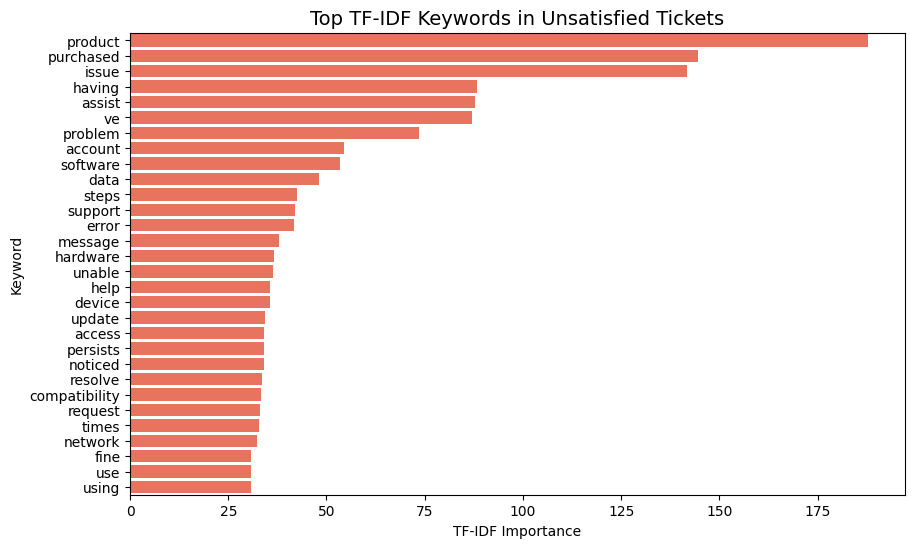

In [ ]:
# Plot Top 30 Keywords
plt.figure(figsize=(10,6))
sns.barplot(data=top30_unsat, x='tfidf', y='keyword', color='tomato')
plt.title("Top TF-IDF Keywords in Unsatisfied Tickets", fontsize=14)
plt.xlabel("TF-IDF Importance")
plt.ylabel("Keyword")
plt.show()

**Insights: Top TF-IDF Keywords (Unsatisfied Tickets)**

- **product** and **purchased** score the highest → problems mostly happen after buying.

- **issue**, **having**, **assist** → customers report ongoing problems and keep asking for help.

- **account**, **data**, **software**, **steps** → many issues relate to login, data loss, or software steps not working.

- **error**, **message**, **unable** → customers frequently face failures while using the product.

- **hardware**, **device** → some failures are physical/device related.

- Overall → **unsatisfied tickets mainly involve product defects, failed processes, and repeated help requests**.

In [ ]:
# Save updated dataset for Notebook 3 (ML Notebook)
df_model.to_csv("df_model_nlp.csv", index=False)
print("Notebook 2 complete — NLP features saved for Machine Learning Notebook.")

Notebook 2 complete — NLP features saved for Machine Learning Notebook.


**Notebook 2 — Final Summary**

**1. Top Ticket Issues**

- Network problems, software bugs, and compatibility issues are the most common reasons for customer complaints.

**2. Satisfaction by Issue Type**

- Refund requests, installation support, and software issues show **higher satisfaction**.

- Delivery problems, compatibility issues, and hardware issues show **lower satisfaction**.

**3. Negative Keyword Analysis (Unsatisfied Customers)**

- NLP shows that unhappy tickets frequently use words like **product, purchased, issue, please, assist, software, error, device, unable**, etc.

- These highlight product defects, repeated requests for help, and unresolved technical failures.

**4. TF-IDF Insights**

- Words like **product, purchased, issue, assist, having, software, data** dominate TF-IDF, confirming root causes of dissatisfaction.

**5. Data Prepared for ML**

- Cleaned text columns added

- Combined text column created

- Word-count based features extracted

- Dataset saved as **df_model_nlp.csv** for Notebook 3

**Conclusion**

Notebook 2 successfully extracts both **descriptive insights** and **NLP features**.
These processed text features are now ready for machine learning modeling in Notebook 3.